# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import datetime

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | aioun
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | warrnambool
Processing Record 10 of Set 1 | ulanhot
Processing Record 11 of Set 1 | awash
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | wau
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | ilebo
Processing Record 18 of Set 1 | coahuayana de hidalgo
Processing Record 19 of Set 1 | levuka
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | darasun
Processing Record 22 of Set 1 | constantia
Processing Record 23 of Set

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,9.80,86,100,1.86,CL,1706492162
1,longyearbyen,78.2186,15.6401,-11.09,79,0,5.14,SJ,1706492351
2,bredasdorp,-34.5322,20.0403,18.94,81,100,1.33,ZA,1706492351
3,adamstown,-25.0660,-130.1015,24.51,77,62,4.50,PN,1706492351
4,grytviken,-54.2811,-36.5092,4.86,87,22,5.42,GS,1706492351


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.80,86,100,1.86,CL,1706492162
1,longyearbyen,78.2186,15.6401,-11.09,79,0,5.14,SJ,1706492351
2,bredasdorp,-34.5322,20.0403,18.94,81,100,1.33,ZA,1706492351
3,adamstown,-25.0660,-130.1015,24.51,77,62,4.50,PN,1706492351
4,grytviken,-54.2811,-36.5092,4.86,87,22,5.42,GS,1706492351


In [3]:
# Convert the timestamp to date (yyyy/mm/dd) format (GeeksforGeeks.org)
timestamp = datetime.datetime.fromtimestamp(city_data_df.iloc[0, 8])
date = timestamp.strftime('%Y-%m-%d')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

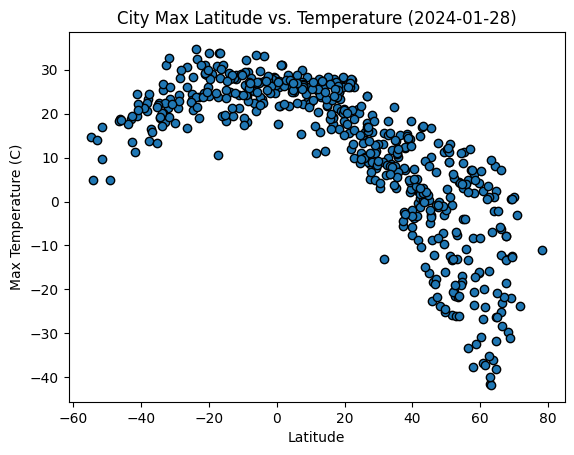

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

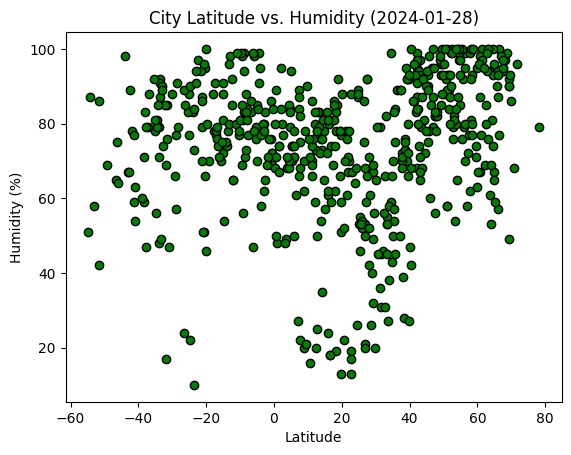

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

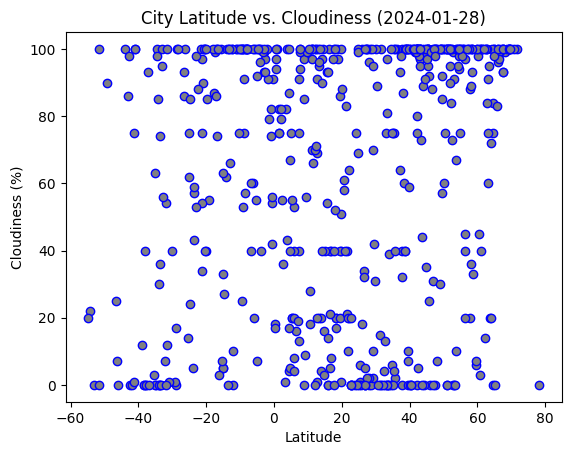

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],facecolors="grey", edgecolors="blue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

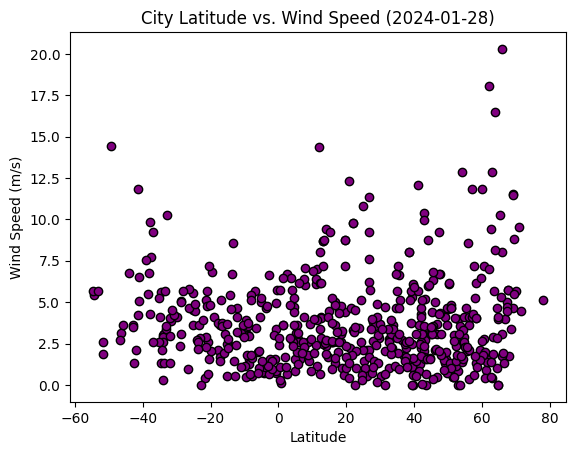

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],facecolors="purple", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def lin_reg_line(x, y, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    lr_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x,y)
    plt.plot(x,lr_values,"r-")
    plt.annotate(line_eq,(min(x)+20, max(y)-7),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is: {rvalue}")
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,-11.09,79,0,5.14,SJ,1706492351
5,aioun,16.6614,-9.6149,17.73,18,5,4.98,MR,1706492351
9,ulanhot,46.0833,122.0833,-18.33,60,0,2.10,CN,1706492352
10,awash,8.9833,40.1667,22.64,70,97,1.43,ET,1706492352
12,wau,7.7029,27.9953,22.31,22,100,2.29,SS,1706492352


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.80,86,100,1.86,CL,1706492162
2,bredasdorp,-34.5322,20.0403,18.94,81,100,1.33,ZA,1706492351
3,adamstown,-25.0660,-130.1015,24.51,77,62,4.50,PN,1706492351
4,grytviken,-54.2811,-36.5092,4.86,87,22,5.42,GS,1706492351
6,avarua,-21.2078,-159.7750,29.03,79,97,5.14,CK,1706492201


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8276369347831032


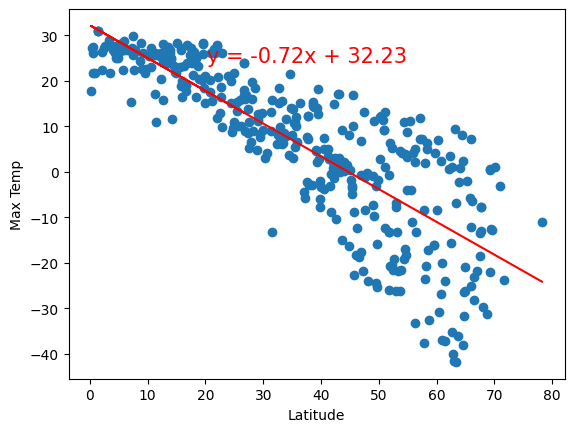

In [72]:
# Linear regression on Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

The r value is: 0.5657998525635762


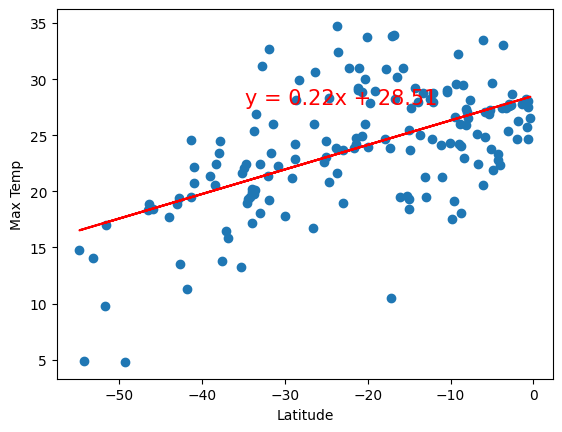

In [73]:
# Linear regression on Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** As expected, the closer one gets to the equator, the warmer it gets. The weaker correlation in the southern hemisphere may be due to the fact that it's summer across the southern hemisphere and temperatures don't vary as much in summer.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3957220768960828


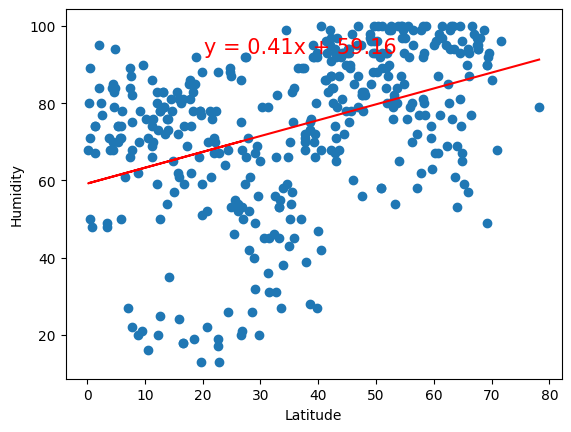

In [74]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

The r value is: 0.21438154100935344


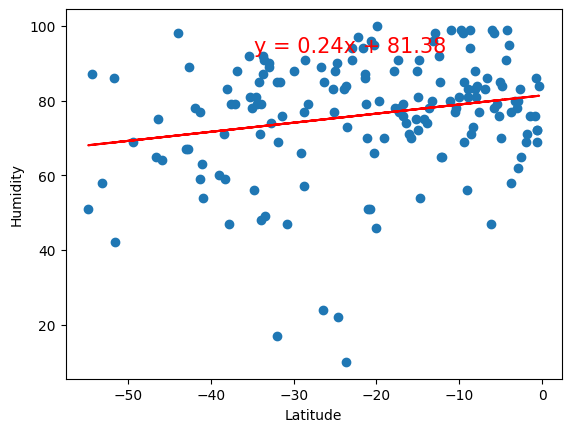

In [75]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** There is a weak correlation in both hemispheres between humidity and latitude. Makes sense since humidity varies based on a number of variables other than distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.27413219570915487


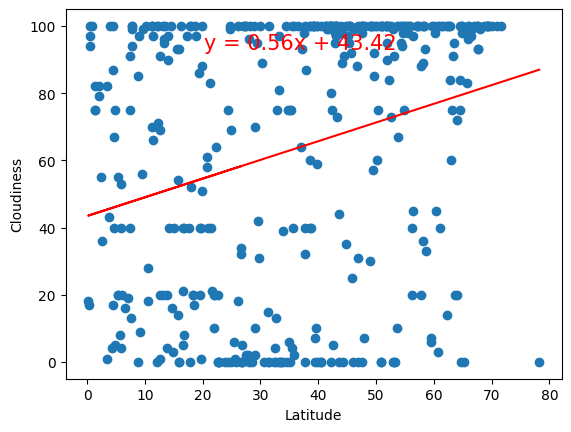

In [76]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

The r value is: 0.4165488875822425


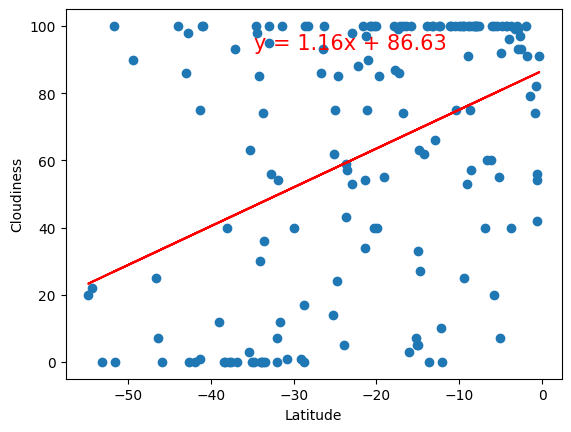

In [77]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Weak correlation in both hemispheres. The interesting thing is that, even though the correlation is weak, cloudiness tends to be greater the further from the equator in the northern hemisphere but decreases the further from the equator in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.08399766750271963


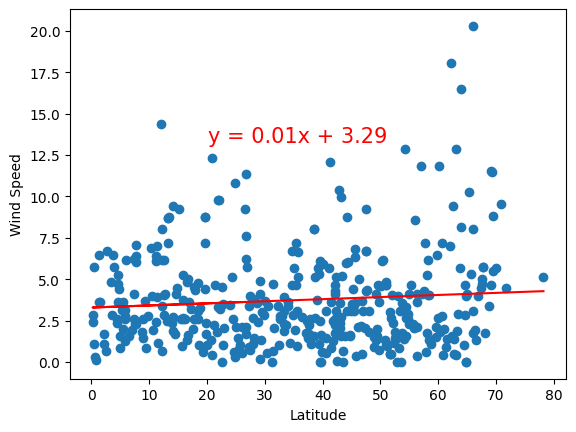

In [78]:
# Northern Hemisphere
lin_reg_line(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

The r value is: -0.3753188742282842


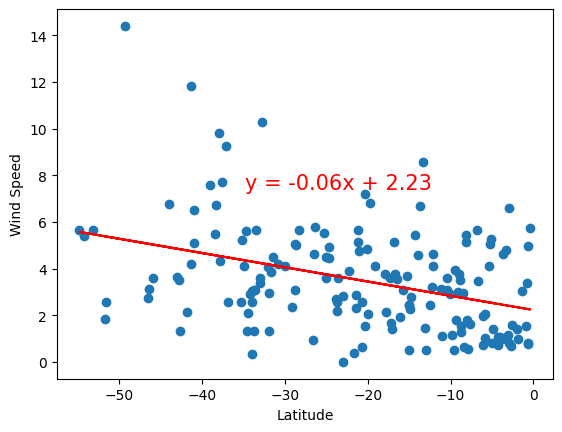

In [79]:
# Southern Hemisphere
lin_reg_line(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There's a very weak correlation between wind speed and latitude in the southern hemisphere and there's virtually no correlation in the northern hemisphere.